In [1]:
%matplotlib notebook
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt

In [2]:
def show3d(x, y, w, w0):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    ## Plot the plane
    xx, yy = np.meshgrid(np.arange(-10, 10, 0.1), np.arange(-10, 10, 0.1))
    z = (-w[0] * xx - w[1] * yy - w0) * 1. /w[2]
    ax.plot_surface(xx, yy, z, alpha=0.4)
    
    ## Plot the dataset
    for m, l in [('o', -1), ('^', 1)]:
        xx = x[y==l, :]
        xs = xx[:, 0]
        ys = xx[:, 1]
        zs = xx[:, 2]
        ax.scatter(xs, ys, zs, marker=m)

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    plt.show()

def show2d(x, y, w, w0):
    line_x = np.linspace(-5, 10)
    line_y = (-w[0]*line_x - w0)/w[1]
    plt.plot(line_x, line_y)                        # show h-plane
    
    plt.scatter(x[:, 0], x[:, 1], c=y)
    plt.xlim([x[:, 0].min()-0.8, x[:, 0].max()+0.8])
    plt.ylim([x[:, 1].min()-0.8, x[:, 1].max()+0.8])
    plt.show()

In [3]:
def get_gradient_w(x, y, w, w0, l):
    g = np.zeros_like(w)
    for xi, yi in zip(x,y):
        g -= yi * xi
    g += l * w / np.linalg.norm(w)
    return g

def get_gradient_w0(x, y, w, w0, l):
    g = 0
    for xi, yi in zip(x,y):
        g -= yi
    return g

def get_loss(x, y, w, w0, la):
    l = 0
    for xi, yi in zip(x, y):
        l -= ((np.dot(xi, w) + w0) * yi)
    l += la * (np.linalg.norm(w) - 1)
    return l

def get_accuracy(x, y, w, w0):
    pl = []
    for xi,yi in zip(x, y):
        pll = np.sign(np.dot(w, xi) + w0)
        if pll == yi:
            pl.append(0)
        else:
            pl.append(1)
    pl = np.array(pl)
    
    plt.figure()
    plt.scatter(x[pl==0, 0], x[pl==0, 1], c="b")
    plt.scatter(x[pl==1, 0], x[pl==1, 1], c="r")
    plt.title("Accuracy")
    
    acc = 1 - (np.sum(pl)/len(pl))
    return acc*100

In [12]:
## Create dataset
num_features = 3
x, y = datasets.make_blobs(n_samples=200, centers=[[1]*num_features, [8]*num_features], n_features=num_features, center_box=(0, 10), cluster_std=1)
y[y==0] = -1

In [13]:
## Initial values for our classifier
w = np.array([-1/3]*num_features)
w0 = -7
l = 1000

<IPython.core.display.Javascript object>


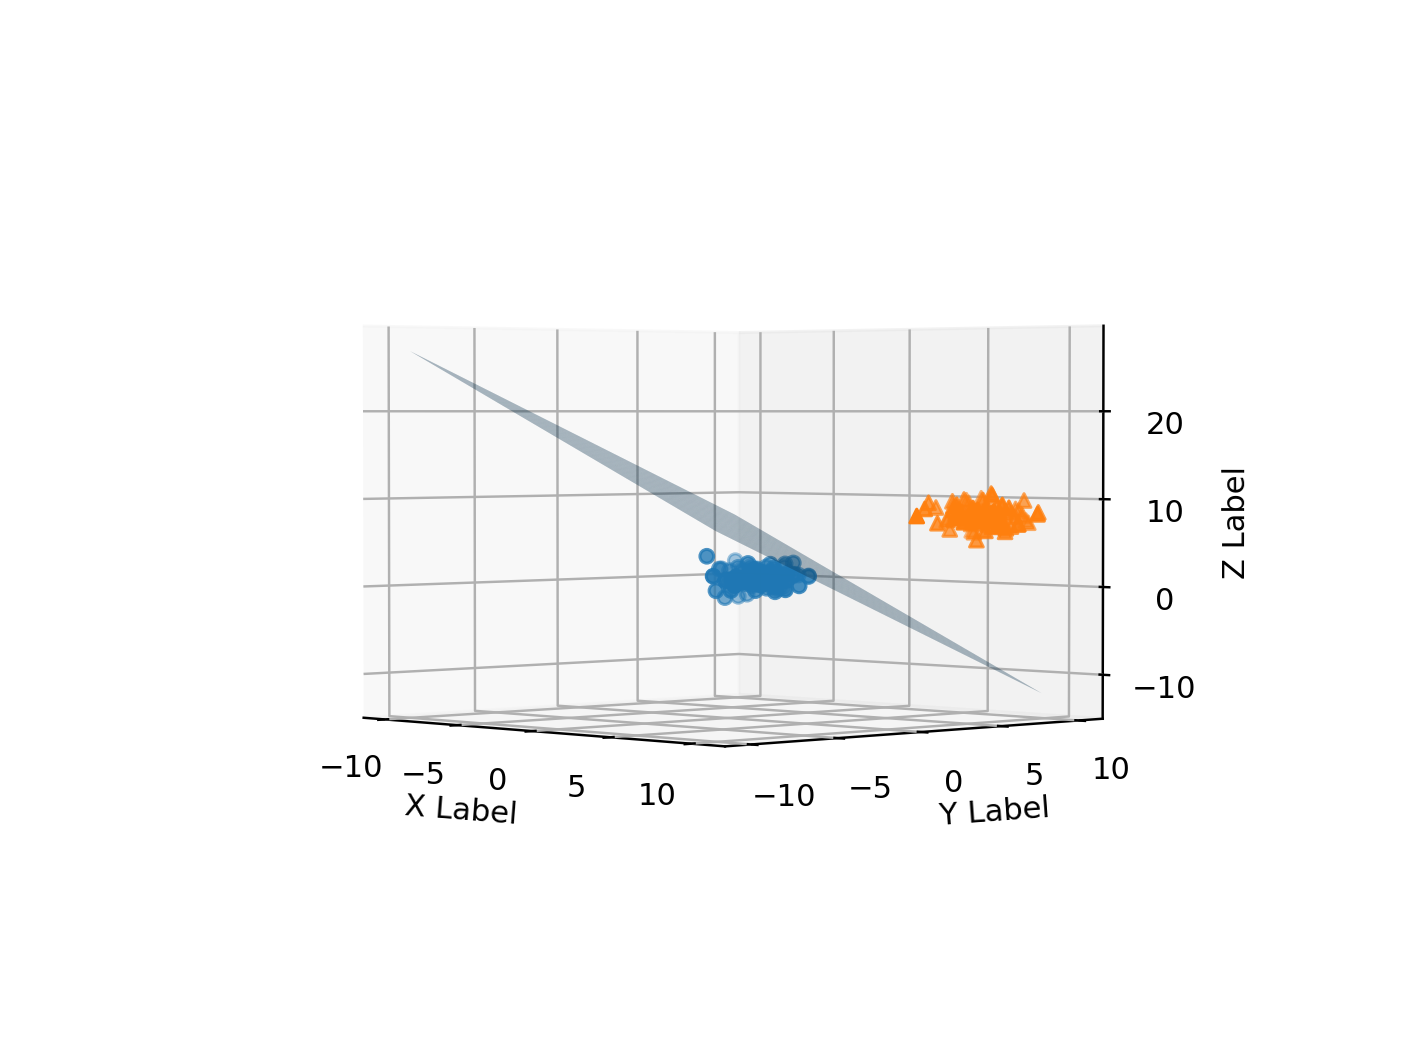

<IPython.core.display.Javascript object>


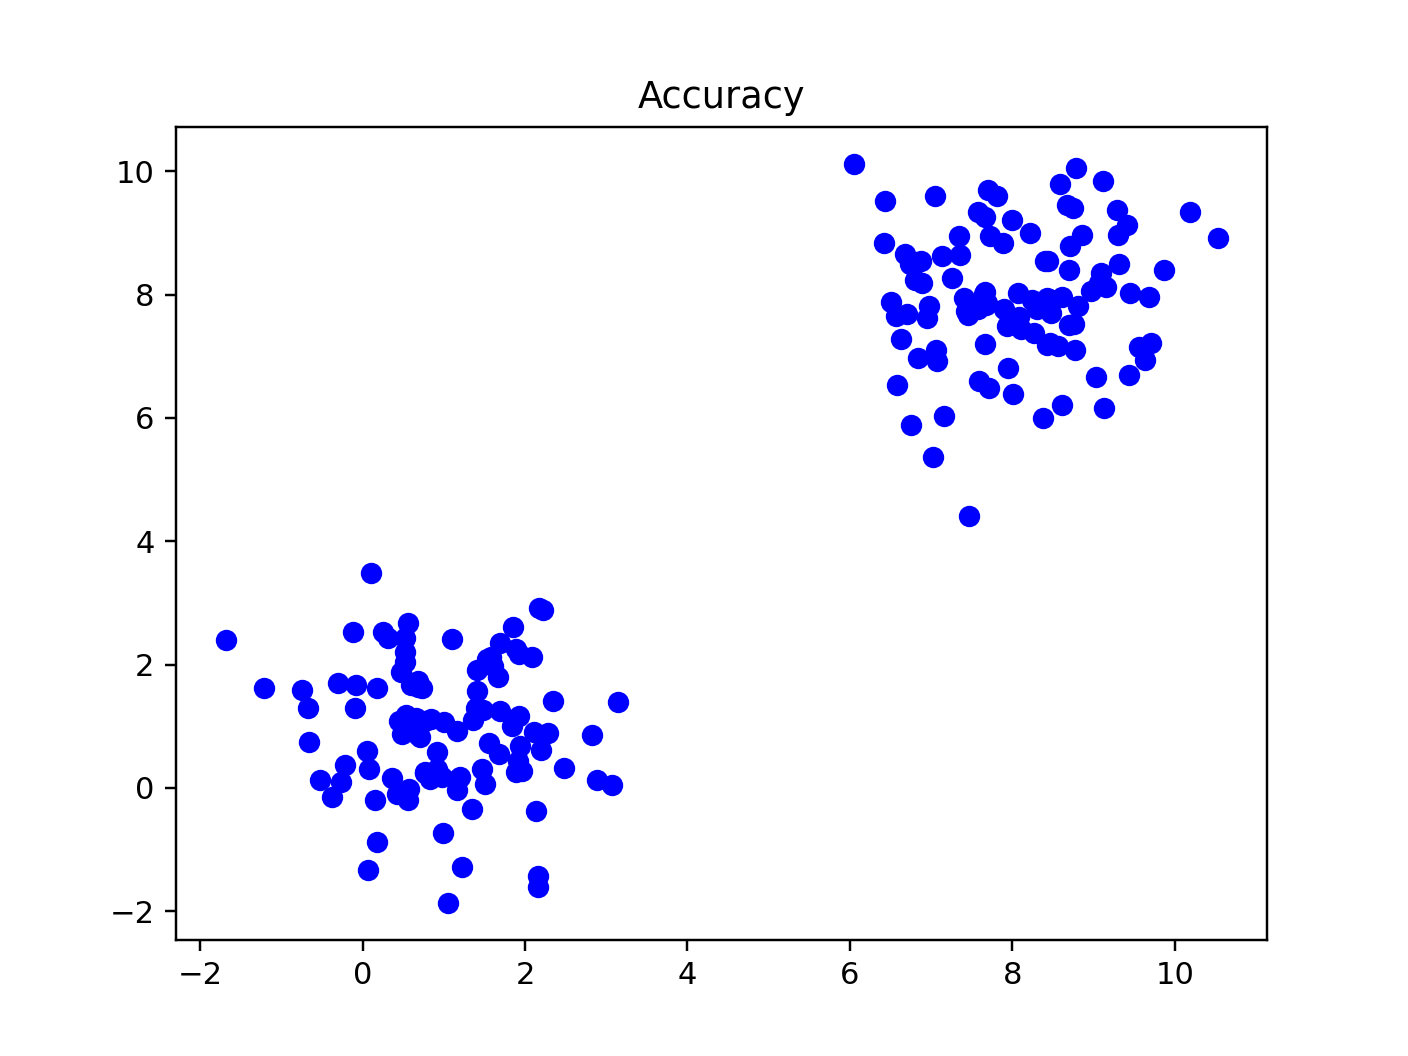

Accuracy:  100.0
Loss:  -1375.6194906245505
w:   [1.07725588 1.07364578 1.10144371]
w0:  -7.0


In [15]:
## Cell which performs one step of G.D.
if num_features == 2:
    show2d(x, y, w, w0)
elif num_features == 3:
    show3d(x, y, w, w0)
else:
    raise NotImplementedError("Can only do this for 2 or 3 dimensions")
print("Accuracy: ", get_accuracy(x, y, w, w0))
print("Loss: ", get_loss(x, y, w, w0, l))

lr = 0.001

## Gradient update
w  = w  - lr *  get_gradient_w(x, y, w, w0, l)
w0 = w0 - lr * get_gradient_w0(x, y, w, w0, l)

print("w:  ", w)
print("w0: ", w0)